In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wines = pd.read_csv('/Users/erinberridge/blendbud/wine_data3.csv')
print(wines.head())

        id             name             type   acidity  fizziness  intensity  \
0  1171671          Margaux          Margaux  4.245219        NaN   3.827806   
1  1112219          Pomerol          Pomerol  3.289715        NaN   4.291344   
2  1194181          Pomerol          Pomerol  3.435617        NaN   4.231121   
3     2472           Malbec           Malbec  2.820961        NaN   3.900594   
4    31554  Sauvignon Blanc  Sauvignon Blanc  4.060016        NaN   2.989165   

   sweetness    tannin  flavor1   flavor2  flavor3     flavor4        flavor5  \
0   1.350550  3.804564      oak   leather     plum  blackberry         earthy   
1   1.516721  3.535764      oak   leather  tobacco        plum        vanilla   
2   1.597392  3.507980      oak      plum  leather     tobacco        vanilla   
3   2.097881  2.680519  leather       oak  tobacco        plum     dark fruit   
4   1.301605       NaN   citrus  tropical     lime  grapefruit  passion fruit   

   average_rating  price_amount 

In [16]:
wines_numerical = wines[["id", "acidity", "fizziness", "intensity", "sweetness", "tannin", "price_amount"]]
wines_numerical = wines_numerical.fillna(0)
print(wines_numerical.head())

        id   acidity  fizziness  intensity  sweetness    tannin  price_amount
0  1171671  4.245219        0.0   3.827806   1.350550  3.804564     29.348839
1  1112219  3.289715        0.0   4.291344   1.516721  3.535764     35.869606
2  1194181  3.435617        0.0   4.231121   1.597392  3.507980     58.686901
3     2472  2.820961        0.0   3.900594   2.097881  2.680519     18.480107
4    31554  4.060016        0.0   2.989165   1.301605  0.000000     31.225008


In [17]:
x = wines_numerical.values
print(x)

[[1.17167100e+06 4.24521880e+00 0.00000000e+00 ... 1.35055050e+00
  3.80456420e+00 2.93488395e+01]
 [1.11221900e+06 3.28971530e+00 0.00000000e+00 ... 1.51672100e+00
  3.53576420e+00 3.58696062e+01]
 [1.19418100e+06 3.43561740e+00 0.00000000e+00 ... 1.59739230e+00
  3.50798030e+00 5.86869008e+01]
 ...
 [5.07800000e+03 3.48765520e+00 0.00000000e+00 ... 1.70689610e+00
  3.87773940e+00 1.28459105e+03]
 [6.61340000e+04 4.69653000e+00 0.00000000e+00 ... 1.62327350e+00
  4.03078900e+00 5.15140574e+02]
 [6.61440000e+04 4.72114040e+00 0.00000000e+00 ... 1.76777720e+00
  4.21573700e+00 8.02054311e+02]]


In [18]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [29]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
print(x_scaled)

[[1.03103477e-01 8.49043760e-01 0.00000000e+00 ... 2.70110100e-01
  8.19696824e-01 7.20599849e-04]
 [9.78710652e-02 6.57943060e-01 0.00000000e+00 ... 3.03344200e-01
  7.61783619e-01 9.41410716e-04]
 [1.05084598e-01 6.87123480e-01 0.00000000e+00 ... 3.19478460e-01
  7.55797552e-01 1.71406627e-03]
 ...
 [4.30812370e-04 6.97531040e-01 0.00000000e+00 ... 3.41379220e-01
  8.35462487e-01 4.32265094e-02]
 [5.80439358e-03 9.39306000e-01 0.00000000e+00 ... 3.24654700e-01
  8.68437163e-01 1.71708270e-02]
 [5.80527369e-03 9.44228080e-01 0.00000000e+00 ... 3.53555440e-01
  9.08284378e-01 2.68865052e-02]]


In [20]:
clusters = KMeans(n_clusters=3).fit(x_scaled)

In [25]:
print(clusters.labels_)
values, counts = np.unique(clusters.labels_, return_counts=True)
print(counts)

[1 1 1 ... 1 1 1]
[201 817  30]


Okay, so it seems like we have 817 wines in a single group. Seems like there might be more clusters, but this is all just a shot in the dark with clustering over all numerical columns. Also, I can't tell if it's clustering over ID number as well, so that's something to look into and potentially change. Let me see if I can graph this.

In [27]:
wines_numerical['cluster'] = clusters.labels_
print(wines_numerical)

           id   acidity  fizziness  intensity  sweetness    tannin  \
0     1171671  4.245219        0.0   3.827806   1.350550  3.804564   
1     1112219  3.289715        0.0   4.291344   1.516721  3.535764   
2     1194181  3.435617        0.0   4.231121   1.597392  3.507980   
3        2472  2.820961        0.0   3.900594   2.097881  2.680519   
4       31554  4.060016        0.0   2.989165   1.301605  0.000000   
...       ...       ...        ...        ...        ...       ...   
1043  4588587  3.090909        0.0   3.181818   2.504545  3.090909   
1044  1612085  3.415989        0.0   4.740252   1.681681  3.473812   
1045     5078  3.487655        0.0   3.783740   1.706896  3.877739   
1046    66134  4.696530        0.0   3.821360   1.623274  4.030789   
1047    66144  4.721140        0.0   3.843902   1.767777  4.215737   

      price_amount  cluster  
0        29.348839        1  
1        35.869606        1  
2        58.686901        1  
3        18.480107        1  
4        

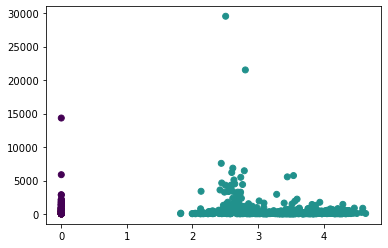

In [28]:
tannin = wines_numerical["tannin"]
price = wines_numerical["price_amount"]
cluster = wines_numerical["cluster"]
plt.scatter(x=tannin,y=price,c=cluster)

... Hm. Okay. So this is not obviously helpful. There appears to be some outliers in price, and given that this is supposed to be an "introductory wine app," I don't think our user base is going to go for the $30,000 bottle. May be worth it to remove those entirely. I'm going to take a quick glance at some other x/y cluster combinations.

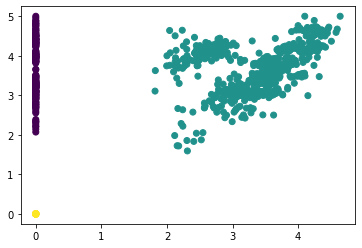

In [30]:
acidity = wines_numerical["acidity"]
plt.scatter(x=tannin,y=acidity,c=cluster)

Located the problem! It's all those NaN values I turned to 0's. Oops, of course that would mess with the clusters. After doing some research (https://stats.stackexchange.com/questions/450445/missing-data-in-k-means-cluster-model), there are a couple ways to go about this (I think). The BEST way would be to impute values based on nearest neighbors-- but the way that seems practical for now is to impute the mean of the column. I'm going to try that and see how it goes.

In [31]:
wines.isna().sum()

id                   0
name                 0
type                30
acidity             30
fizziness         1031
intensity           30
sweetness           47
tannin             231
flavor1              3
flavor2              6
flavor3              8
flavor4             14
flavor5             17
average_rating       0
price_amount         0
price_currency       0
review_count         0
food_ids            30
food_names          30
dtype: int64

Ideally, this should only really be a problem for fizziness and *maybe* tannin. Fizziness makes sense, though, because that's more of a big category by itself (and the vast majority of wines won't be fizzy at all). Redoing what we did before, and while we're at it, let's remove the id and fizziness because I don't think that will help us much either:

In [33]:
wines_numerical = wines[["acidity", "intensity", "sweetness", "tannin", "price_amount"]]
wines_numerical = wines_numerical.fillna(wines_numerical.mean())
print(wines_numerical.head())

    acidity  intensity  sweetness    tannin  price_amount
0  4.245219   3.827806   1.350550  3.804564     29.348839
1  3.289715   4.291344   1.516721  3.535764     35.869606
2  3.435617   4.231121   1.597392  3.507980     58.686901
3  2.820961   3.900594   2.097881  2.680519     18.480107
4  4.060016   2.989165   1.301605  3.333826     31.225008


In [34]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
clusters = KMeans(n_clusters=3).fit(x_scaled)
values, counts = np.unique(clusters.labels_, return_counts=True)
print(counts)

[817  30 201]


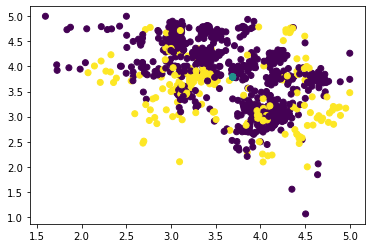

In [35]:
wines_numerical['cluster'] = clusters.labels_
acidity = wines_numerical["acidity"]
intensity = wines_numerical["intensity"]
cluster = wines_numerical["cluster"]
plt.scatter(x=acidity,y=intensity,c=cluster)

Something different! These clusters definitely do not make sense. Let's see if more centroids/clusters will fix it.

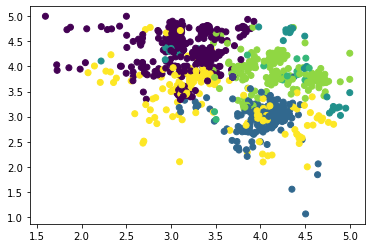

In [36]:
clusters = KMeans(n_clusters=7).fit(x_scaled)
wines_numerical['cluster'] = clusters.labels_
acidity = wines_numerical["acidity"]
intensity = wines_numerical["intensity"]
cluster = wines_numerical["cluster"]
plt.scatter(x=acidity,y=intensity,c=cluster)

I'm starting to get mad and sleepy. A good way to check the ideal number of clusters would be the 'elbow method,' which I plan to attack later. This is really just more of a note to me. I'm also now wondering if I should include average rating as a feature to include here.

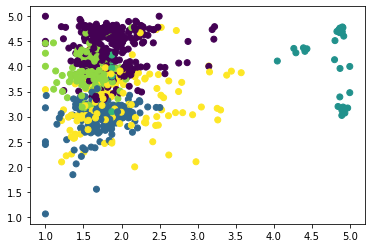

In [37]:
sweetness = wines_numerical["sweetness"]
plt.scatter(x=sweetness,y=intensity,c=cluster)

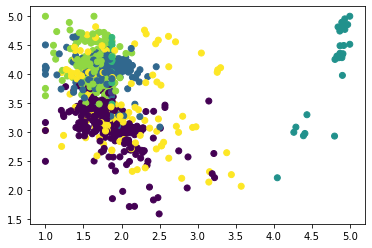

In [38]:
plt.scatter(x=sweetness,y=acidity,c=cluster)

These clusters can be thought of as *intersections* between two qualities in two wines. As compared to direct comparison of a value (sweetness in one wine vs. sweetness in another), this shows comparison of two values (sweetness and acidity levels in one wine vs. in another). I'm thinking that *potentially* a person could like sweet wines with a certain mouthfeel, like more acidic or less. This is more personalized than just showing them sweet wines.